# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Base de Dados: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

#### Importar a Base de dados

In [17]:
import pandas as pd

tabela= pd.read_csv("advertising.csv")

display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

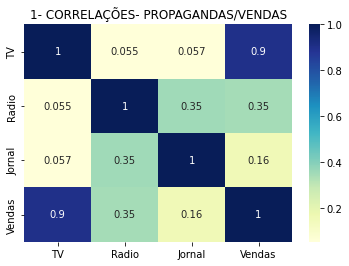

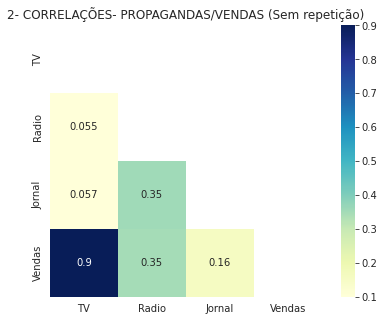

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

''' GRÁFICO SIMPLES'''

tablea_real= sns.heatmap(tabela.corr(), annot=True, cmap="YlGnBu")

plt.title("1- CORRELAÇÕES- PROPAGANDAS/VENDAS") 

#tabela_real.set(label='BELEZA xlabel', ylabel='URIS ylabel')

'''GRÁFICO PARA MELHOR VISUALIZAÇÃO'''

corr= tabela.corr()

mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, vmin=.1, square=True, cmap= "YlGnBu", annot=True)


plt.title("2- CORRELAÇÕES- PROPAGANDAS/VENDAS (Sem repetição)")    


plt.show()



#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [19]:
y = tabela ["Vendas"]

x = tabela [["TV", "Radio", "Jornal"]] #São duas colunas, portanto, dois colchetes!

from sklearn.model_selection import train_test_split

x_treino, x_test, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=1)  


#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

modelo_regressaolinear= LinearRegression()
modelo_arvoredecisao= RandomForestRegressor()

modelo_regressaolinear.fit (x_treino, y_treino)
modelo_arvoredecisao.fit (x_treino, y_treino)



RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [21]:
previsao_regressaolinear= modelo_regressaolinear.predict(x_test)
previsao_arvoredecisao= modelo_arvoredecisao.predict(x_test)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))

print(r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9639773030925571


#### Visualização Gráfica das Previsões

<function matplotlib.pyplot.show(close=None, block=None)>

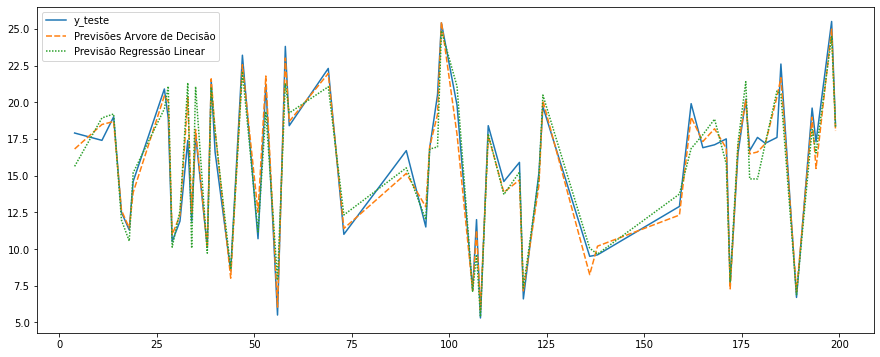

In [22]:
tabela_auxiliar = pd.DataFrame()

tabela_auxiliar["y_teste"] = y_teste

tabela_auxiliar ["Previsões Arvore de Decisão"] = previsao_arvoredecisao

tabela_auxiliar ["Previsão Regressão Linear"] = previsao_regressaolinear

plt.figure (figsize = (15, 6))

melhor_teste= sns.lineplot(data=tabela_auxiliar)

plt.show

#### Como fazer uma nova previsão?

In [23]:
novos = pd.read_csv("novos.csv")

display(novos)


,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


Predição com o método campeão (Maior acurácia)

In [24]:
previsao= modelo_arvoredecisao.predict (novos)

print(previsao)



[ 7.585  8.725 19.89 ]
